In [61]:
W = CoxeterGroup(['H', 3],implementation="coxeter3")  ### FIX W.bruhat_poset()
[s1,s2,s3] = W.simple_reflections()

##################################################################################

n = rank(W)
w0 = W.long_element()
e = W([])


####### Kazhdan-Lusztig polynomials ##########################

# A faster implementation of KL-polynomials (using the optional package Coxeter 3) is given by this
# Fokko Ducloux’s Coxeter3 C++ library.

# Had to install it: I just typed "sage -i coxeter3" in the terminal.

# It seems that one can direcly coerce from WeylGroup to CoxeterGroup and vice versa.
# I will therefore use CoxeterGroup to calculate KL-polynomials, but for all other Bruhat business I will use WeylGroup.

R.<q> = LaurentPolynomialRing(QQ)




def KLP(x,y):
    '''Returns the KL-polynomial, implemented in "Coxeter3" package by Fokko du Cloux.
    http://math.univ-lyon1.fr/~ducloux/coxeter/coxeter3/english/coxeter3_e.html'''
    
    if x not in W:
        x = convert_from_123(x)
    if y not in W:
        y = convert_from_123(y)
    
    return W.kazhdan_lusztig_polynomial(x,y)


def mu(w,x):
    '''Returns the KL mu-function with arguments w,x.
    By Humphrey's BGG book p. 175 and p. 169, for w<x we have:
    mu(x,w) = mu(w0*w,w0*x),
    mu(w,x) = dim Exit^1 (L_w,L_x) = dim Exit^1(L_x,L_w) = dim Exit^1(Delta_x,L_w).'''

    if w not in W:
        w = convert_from_123(w)
    if x not in W:
        x = convert_from_123(x)
        
    if w.bruhat_le(x):
        poly_dict = KLP(w,x).dict()       
        j = (x.length()-w.length()-1)/2 
        if j not in poly_dict.keys():
            return 0
        return poly_dict[j]

    return 0


def DR(w):
    '''Returns the set of simple right descents of w.'''
    
    return {W.simple_reflections()[i] for i in w.descents()}


def DL(w):
    '''Returns the set of simple left   descents of w.'''
        
    return DR(w.inverse())


def AL(w):
    '''Returns the set of simple left ascends of w.'''
    
    DescLe = list(DL(w))
    AscLe = [s for s in W.simple_reflections() if s not in DescLe]
    return set(AscLe)


def AR(w):
    '''Returns the set of simple right ascends of w.'''
    
    DescRi = list(DR(w))
    AscRi = [s for s in W.simple_reflections() if s not in DescRi]
    return set(AscRi)



#### Coxeter non-Weyl group speciffic functions:

def bruhat_interval(x,y):
    '''A fix for W.bruhat_interval(), which does not work correctly for '''
    
    return [W(z) for z in W.bruhat_interval(x,y)]


def convert_to_123(w):
    '''E.g. s1*s2*s1 = [1, 2, 1] maps to "121".'''
    
    w = W(w)
    if w == e:
        return "e"
    return "".join([str(t) for t in list(w)])
    
    



In [62]:
############### BIGRASSMANNIANS ###############

bigrassmannians = [x for x in W if len(DR(x))==1 and len(DL(x))==1]
print("#bigrassmannians = %d"%len(bigrassmannians))
print("bigrassmannians = %s"%bigrassmannians)
print()

#bigrassmannians = 43
bigrassmannians = [[3], [2], [3, 2], [2, 3], [3, 2, 3], [2, 3, 2], [3, 2, 3, 2], [2, 3, 2, 3], [1], [2, 1], [3, 2, 1], [2, 3, 2, 1], [3, 2, 3, 2, 1], [1, 2], [2, 3, 1, 2], [3, 2, 3, 1, 2], [2, 3, 2, 3, 1, 2], [1, 2, 3], [2, 3, 1, 2, 3], [3, 2, 3, 1, 2, 3], [2, 3, 2, 3, 1, 2, 3], [1, 2, 3, 2], [2, 3, 1, 2, 3, 2], [3, 2, 3, 1, 2, 3, 2], [2, 3, 2, 1, 2, 3, 2], [3, 2, 3, 2, 1, 2, 3, 2], [2, 3, 2, 3, 1, 2, 3, 2], [1, 2, 3, 2, 3], [2, 3, 2, 1, 2, 3, 2, 3], [3, 2, 3, 2, 1, 2, 3, 2, 3], [1, 2, 3, 2, 1], [2, 3, 1, 2, 3, 2, 1], [3, 2, 3, 1, 2, 3, 2, 1], [2, 3, 2, 3, 1, 2, 3, 2, 1], [1, 2, 3, 2, 3, 1, 2], [2, 3, 2, 1, 2, 3, 2, 3, 1, 2], [3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2], [1, 2, 3, 2, 3, 1, 2, 3], [2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3], [3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3], [1, 2, 3, 2, 3, 1, 2, 3, 2], [2, 3, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2], [1, 2, 3, 2, 3, 1, 2, 3, 2, 1]]



In [63]:
############### JOIN-IRREDUCIBLES ###############


join_irreducibles = []
bigrassmannians_copy = [x for x in bigrassmannians]

for y in W:
    inter = bruhat_interval(e,y)
    
    complement = [z for z in W if z not in inter]
    
    remove_b = []
    
    for b in bigrassmannians_copy: # Is b minimum in complement?
        if b in complement:
            is_min = 1
            for z in complement:
                if z.bruhat_le(b) and z != b:
                    is_min = 0
                    break
            if is_min == 1:
                print("%s is join-irreducible!"%b)
                join_irreducibles.append(b)
                if b not in remove_b:
                    remove_b.append(b)
                    
    for b in remove_b:
        bigrassmannians_copy.remove(b)
  

    

print("***************************************************\n")
print("#join_irreducibles = %d"%len(join_irreducibles))
print("join_irreducibles = %s"%join_irreducibles)
print()

[3] is join-irreducible!
[2] is join-irreducible!
[1] is join-irreducible!
[2, 3] is join-irreducible!
[3, 2] is join-irreducible!
[2, 3, 2] is join-irreducible!
[3, 2, 3] is join-irreducible!
[2, 3, 2, 3] is join-irreducible!
[3, 2, 3, 2] is join-irreducible!
[1, 2] is join-irreducible!
[2, 1] is join-irreducible!
[3, 2, 1] is join-irreducible!
[1, 2, 3] is join-irreducible!
[2, 3, 2, 1] is join-irreducible!
[3, 2, 3, 2, 1] is join-irreducible!
[1, 2, 3, 2] is join-irreducible!
[2, 3, 2, 3, 1, 2] is join-irreducible!
[1, 2, 3, 2, 3] is join-irreducible!
[3, 2, 3, 1, 2, 3] is join-irreducible!
[1, 2, 3, 2, 1] is join-irreducible!
[2, 3, 2, 3, 1, 2, 3] is join-irreducible!
[2, 3, 1, 2, 3, 2] is join-irreducible!
[3, 2, 3, 1, 2, 3, 2] is join-irreducible!
[2, 3, 2, 3, 1, 2, 3, 2] is join-irreducible!
[2, 3, 1, 2] is join-irreducible!
[3, 2, 3, 1, 2] is join-irreducible!
[3, 2, 3, 2, 1, 2, 3, 2] is join-irreducible!
[1, 2, 3, 2, 3, 1, 2] is join-irreducible!
[2, 3, 1, 2, 3] is join-irredu

In [64]:
############### DISSECTORS ###############

def is_dissector(x):
    A = bruhat_interval(x,w0)
    B = [y for y in W if y not in A]
    for y in B:
        if set(B) == set(bruhat_interval(e,y)):
            return True
    return False


dissectors = []
for x in bigrassmannians:
    if is_dissector(x):
        print("%s is a dissector!"%x)
        dissectors.append(x)

print("***************************************************\n")

print("#dissectors = %d"%len(dissectors))
print("dissectors = %s"%dissectors)
print()

[3] is a dissector!
[2] is a dissector!
[3, 2] is a dissector!
[2, 3] is a dissector!
[3, 2, 3] is a dissector!
[2, 3, 2] is a dissector!
[3, 2, 3, 2] is a dissector!
[2, 3, 2, 3] is a dissector!
[1] is a dissector!
[2, 1] is a dissector!
[3, 2, 1] is a dissector!
[2, 3, 2, 1] is a dissector!
[3, 2, 3, 2, 1] is a dissector!
[1, 2] is a dissector!
[2, 3, 1, 2] is a dissector!
[3, 2, 3, 1, 2] is a dissector!
[2, 3, 2, 3, 1, 2] is a dissector!
[1, 2, 3] is a dissector!
[2, 3, 1, 2, 3] is a dissector!
[3, 2, 3, 1, 2, 3] is a dissector!
[2, 3, 2, 3, 1, 2, 3] is a dissector!
[1, 2, 3, 2] is a dissector!
[2, 3, 1, 2, 3, 2] is a dissector!
[3, 2, 3, 1, 2, 3, 2] is a dissector!
[3, 2, 3, 2, 1, 2, 3, 2] is a dissector!
[2, 3, 2, 3, 1, 2, 3, 2] is a dissector!
[1, 2, 3, 2, 3] is a dissector!
[2, 3, 2, 1, 2, 3, 2, 3] is a dissector!
[3, 2, 3, 2, 1, 2, 3, 2, 3] is a dissector!
[1, 2, 3, 2, 1] is a dissector!
[2, 3, 1, 2, 3, 2, 1] is a dissector!
[3, 2, 3, 1, 2, 3, 2, 1] is a dissector!
[2, 3, 2, 3,

In [65]:
E = list(W)

def f(x,y):
    return x.bruhat_le(y)

W_poset = Poset((E,f))

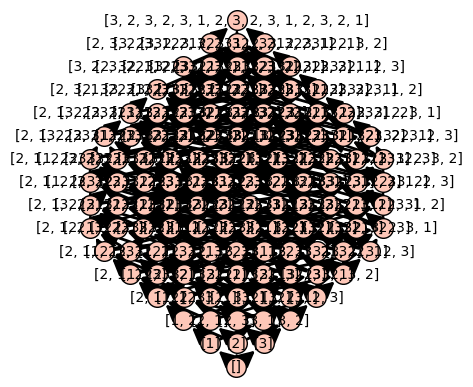

In [66]:
W_poset.plot()

232-2312
23231232-2321232312
2323-23123
2323123-23212323
3232-32312
3231232-32321232


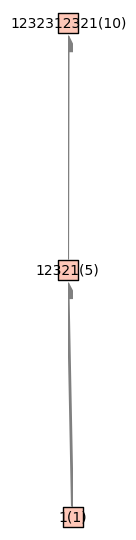

*************************


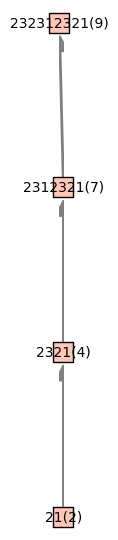

*************************


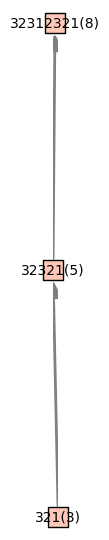

*************************


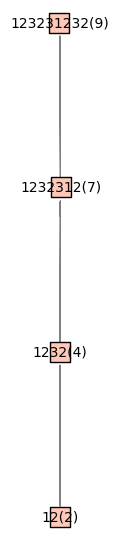

*************************


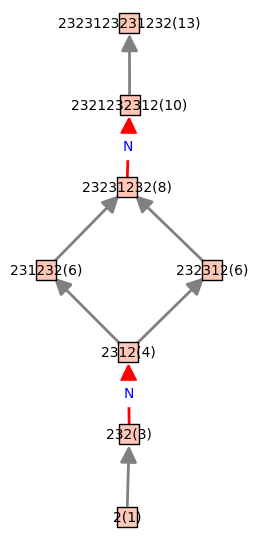

*************************


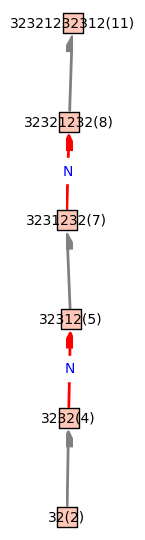

*************************


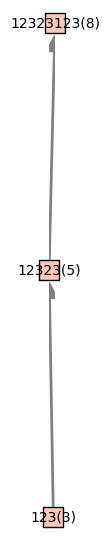

*************************


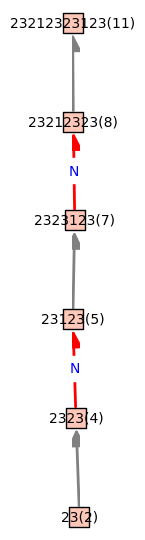

*************************


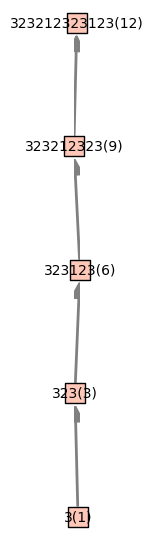

*************************


In [67]:
############### PLOTTING NON-CHAINS OF BIGRASSMANNIANS ###############
# W_poset = W.bruhat_poset() does not work

badpairs = []
B = join_irreducibles
for i in range(1,n+1):
    for j in range(1,n+1):
        B_ij = [x for x in join_irreducibles if DL(x)=={W.simple_reflections()[i]} and DR(x)=={W.simple_reflections()[j]}]
        
        for x in B_ij:
            for y in B_ij:
                inter = bruhat_interval(x,y)
                if len([z for z in inter if z in B_ij])==2:
                    
                    exists = 0
                    
                    for w in W:
                        if ( W.simple_reflections()[i]  not in DL(w) or W.simple_reflections()[j] not in DR(w)) and x.bruhat_le(w) and w.bruhat_le(y):
                            exists = 1
                            break
                    
#                    if exists == 1:
#                        print(convert_to_123(x),convert_to_123(y),"ok",convert_to_123(w))
                    if exists == 0:
                        badpairs.append((convert_to_123(x)+"(%d)"%x.length(),convert_to_123(y)+"(%d)"%y.length()))
                        print("%s-%s"%(convert_to_123(x),convert_to_123(y)))
             
            
default_vertex_color = "#fec7b8"
for i in range(1,n+1):
    for j in range(1,n+1):
        join_irreducibles_fixed = [x for x in join_irreducibles if DR(x)=={W.simple_reflections()[i]} and DL(x)=={W.simple_reflections()[j]}]
        if join_irreducibles_fixed != []:
            P = W_poset.subposet(join_irreducibles_fixed)
            if True: #not P.is_chain():
                Q = P.relabel(lambda x: convert_to_123(x)+"(%d)"%x.length())
                #colors =  { #"yellow" : [ Q(convert_to_123(x)) for x in bigrassmannians_fixed if x not in dissectors],
                           #"blue" : [ Q(convert_to_123(x)) for x in bigrassmannians_fixed if x not in join_irreducibles],
                          #default_vertex_color : [Q(convert_to_123(x)) for x in bigrassmannians_fixed if x in dissectors]}
                
                cov_lb = []
                for cov in Q.cover_relations():
                    a,b = cov
                    if (str(a),str(b)) in badpairs:
                        cov_lb.append(cov+["N"])
                    else:
                        cov_lb.append(cov+[""])
                
                cov_red = []
                cov_gray = []
                for cov in Q.cover_relations():
                    a,b = cov
                    if (str(a),str(b)) in badpairs or (str(b),str(a)) in badpairs:
                        cov_red.append(cov)
                    else:
                        cov_gray.append(cov)
                
                grap = Q.plot(figsize = 8.3,cover_color="gray",element_shape = "s", cover_labels = cov_lb,
                              cover_colors = {"red" : cov_red, "gray" : cov_gray}) #element_colors = colors, 
                show(grap)
                
                if not os.path.isdir("posets"):  
                    os.mkdir("posets") 
                path = "posets/" + CartanType(W)[0]+str(CartanType(W)[1])
                if not os.path.isdir(path): 
                    os.mkdir(path)   
                    
                grap.save(path+'/J_%d%d.png'%(i,j))      
                print("*************************")                   
                    
 

In [68]:
[x for x in bigrassmannians if x not in join_irreducibles]

[[2, 3, 2, 1, 2, 3, 2]]